In [1]:
from decimal import *
import math
from functools import reduce

precision = 1000
getcontext().prec = precision

def get_constant(name):
    if(name == 'phi'):
        return str((Decimal(1) + Decimal(5) ** Decimal(0.5) )/ Decimal(2))
    elif(name == 'pi'):
        return str(sum(Decimal(1)/Decimal(16)**k * (Decimal(4)/(8*k+1) - Decimal(2)/(8*k+4) - Decimal(1)/(8*k+5) - Decimal(1)/(8*k+6)) for k in range(precision)))
    elif(name == 'euler'):
        return str(1 + sum(Decimal(1)/Decimal(math.factorial(x)) for x in range(1, 1000)))
    elif(name == 'fibonacci'):
        fib = lambda n: reduce(lambda x,n:[x[1],x[0]+x[1]], range(n),[0,1])[0]
        return str(fib(precision))
    else:
        return str(sum(Decimal(1)/Decimal(10)**Decimal(x) for x in range(precision)))
    
# Select here which constant to use
# Golden ratio = 'phi'
constant = get_constant('phi')

# Put all digits into list as discrete elements.  
digits = []
for x in range(2, len(constant)): 
    digits.append(int(constant[x:x+1]))

In [2]:
# Create starting vector
x, y = [0], [0]

for i in range(len(digits)-1):

    # Digit to radians to vector
    x_vector = math.sin(digits[i] / 10 * 2 * math.pi)
    y_vector = math.cos(digits[i] / 10 * 2 * math.pi)

    # Shift the current vector by the new one and add
    x.append(x[i] + x_vector)
    y.append(y[i] + y_vector)


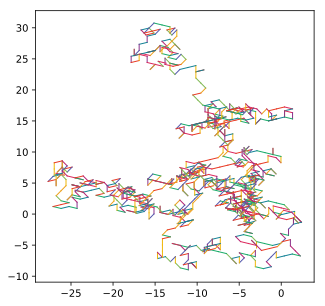

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#efb608","#eda01c","#e83923","#dc265b","#b62071",
          "#88308a","#5357ac","#128195","#18aa68","#7fb853"]

i=0

plt.figure(figsize=[5,5], dpi=300)

for x1, x2, y1, y2 in zip(x, x[1:], y, y[1:]):
    color_num = digits[i]
    i = i + 1
    plt.plot([x1, x2], [y1, y2], color=colors[color_num], linewidth=1,)

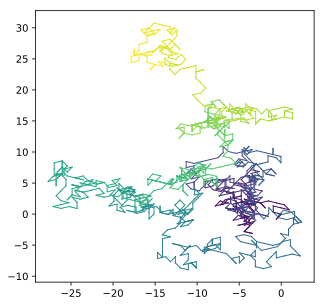

In [4]:
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

i=0

plt.figure(figsize=[5,5], dpi=300)

for x1, x2, y1, y2 in zip(x, x[1:], y, y[1:]):
    plt.plot([x1, x2], [y1, y2], color=cm.viridis(i/precision), linewidth=1,)
    i += 1
    
#plt.savefig('phi100000.svg');